In [1]:
from nnlearn.Network import *
from numba import njit
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d


In [2]:
#creating network with 2 hidden layers

np.random.seed(100)

test_net_layers = [
    input_layer(size = 2),
    
    connected_layer(num_neurons = 10, prev_neurons = 2),
    sigmoid_activation_layer(10),
    
    connected_layer(num_neurons = 10, prev_neurons = 10),
    sigmoid_activation_layer(10),
    
    connected_layer(num_neurons = 2, prev_neurons = 10)
    
]

test_net = network(test_net_layers)

test_net.print_structure()

---------------------------------------------
<class 'nnlearn.Layers.connected_layer'>
  layer: 5/5
neurons: 2
 prev n: 10
 params: 22

---------------------------------------------
<class 'nnlearn.Layers.sigmoid_activation_layer'>
  layer: 4/5
neurons: 10
 prev n: 10
 params: 0

---------------------------------------------
<class 'nnlearn.Layers.connected_layer'>
  layer: 3/5
neurons: 10
 prev n: 10
 params: 110

---------------------------------------------
<class 'nnlearn.Layers.sigmoid_activation_layer'>
  layer: 2/5
neurons: 10
 prev n: 10
 params: 0

---------------------------------------------
<class 'nnlearn.Layers.connected_layer'>
  layer: 1/5
neurons: 10
 prev n: 2
 params: 30

---------------------------------------------
<class 'nnlearn.Layers.input_layer'>
  layer: 0/5
neurons: 2
 prev n: None
 params: 0

--------------------------------------------- 
total params: 162


In [3]:
#creating data points to learn

x = np.random.uniform(-2,2,(1000,2))

y = np.array([[s[0]*s[1] , np.cos(s[0] + s[1])] for s in x])



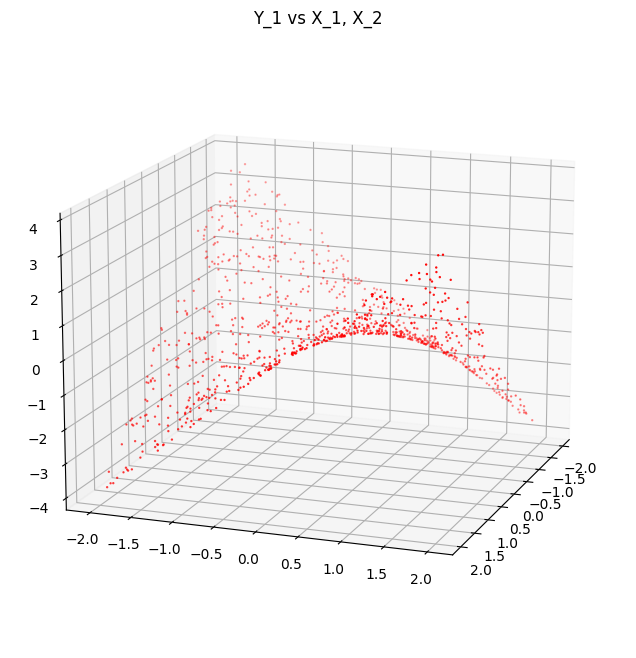

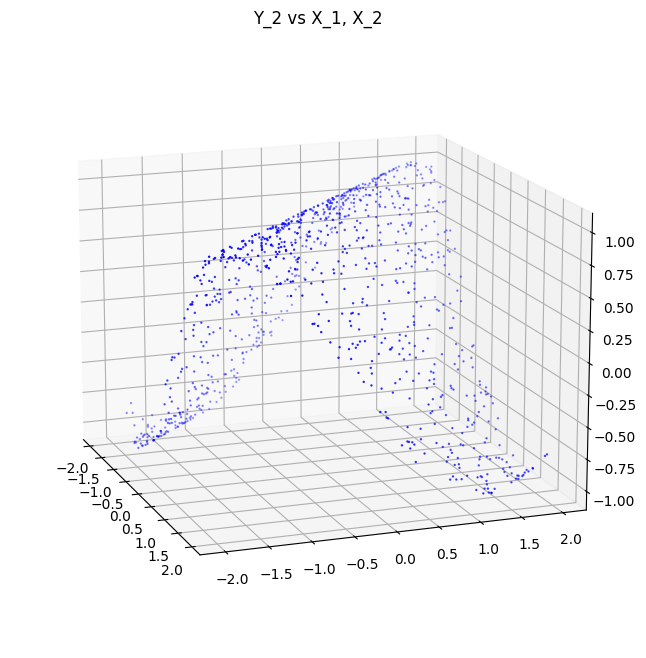

In [4]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection = "3d")
plt.title("Y_1 vs X_1, X_2")

ax.scatter(x[:,0], x[:,1], y[:,0], s = .5, color = 'r', label = 'y_1')

ax.view_init(15, 20)
plt.show()



plt.figure(figsize=(8,8))
ax = plt.axes(projection = "3d")
plt.title("Y_2 vs X_1, X_2")

ax.scatter(x[:,0], x[:,1], y[:,1], s = .5, color = 'b', label = "y_2")

ax.view_init(15, -20)
plt.show()


In [5]:
start = time()

test_net.minibatch_fit(x, y, batch_size = 200, epochs = 2000, learn_coef_bounds = (.3,.2))


test_net.minibatch_fit(x, y, batch_size = None, epochs = 2000, learn_coef_bounds = (.2,.1))


end = time()
print("\n\n train time:", round(end-start, 2), "sec")



--------------------
epoch: 1 
 loss: 1.1961
--------------------
epoch: 401 
 loss: 0.064
--------------------
epoch: 801 
 loss: 0.029
--------------------
epoch: 1201 
 loss: 0.0223
--------------------
epoch: 1601 
 loss: 0.0161
--------------------
epoch: 2000 
 loss: 0.0113
--------------------
epoch: 2001 
 loss: 0.0112
--------------------
epoch: 2401 
 loss: 0.0077
--------------------
epoch: 2801 
 loss: 0.0059
--------------------
epoch: 3201 
 loss: 0.005
--------------------
epoch: 3601 
 loss: 0.0044
--------------------
epoch: 4000 
 loss: 0.0041


 train time: 95.26 sec


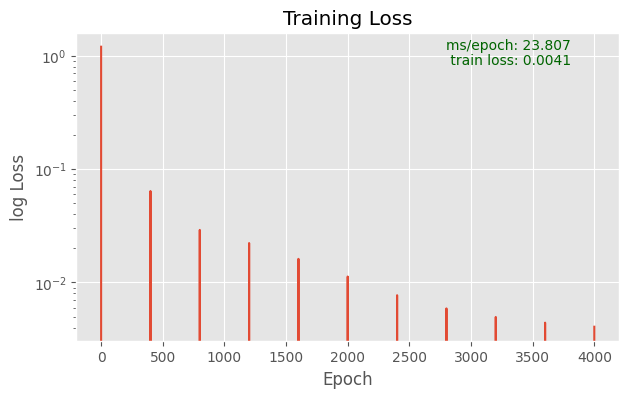

In [6]:
test_net.graph_loss_history()

In [7]:
x_test = np.random.uniform(-2,2,(1000,2))

y_test = np.array([[s[0]*s[1], s[0] + s[1]] for s in x])

y_test_fitted = np.array([test_net.predict(x)  for x in x_test  ])

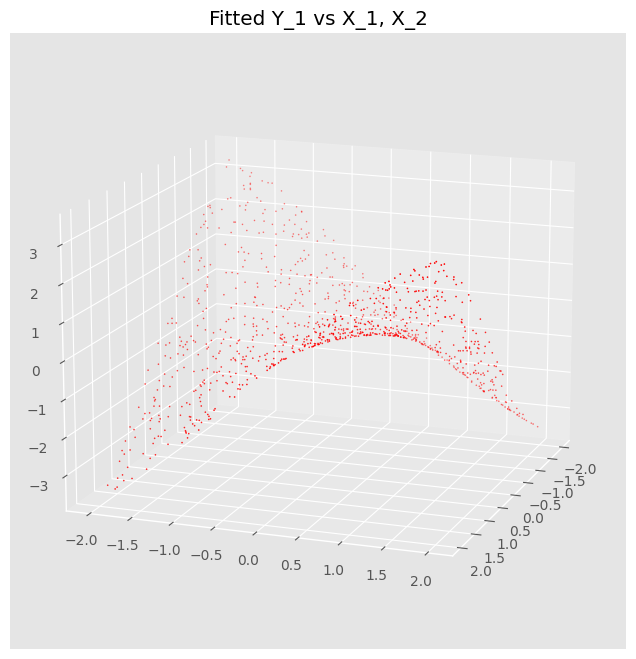

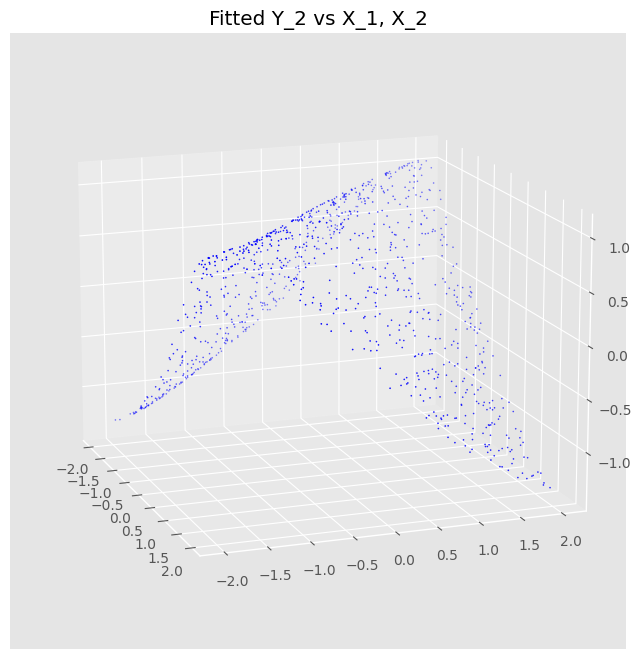

In [8]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection = "3d")
plt.title("Fitted Y_1 vs X_1, X_2")

ax.scatter(x_test[:,0], x_test[:,1], y_test_fitted[:,0], s = .5, color = 'r', label = 'y_1')

ax.view_init(15, 20)
plt.show()

plt.figure(figsize=(8,8))
ax = plt.axes(projection = "3d")
plt.title("Fitted Y_2 vs X_1, X_2")

ax.scatter(x_test[:,0], x_test[:,1], y_test_fitted[:,1], s = .5, color = 'b', label = "y_2")

ax.view_init(15, -20)
plt.show()